<a href="https://colab.research.google.com/github/tuomaseerola/music21/blob/master/ScoreAnalysisTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music21 Score Analysis Tutorial**

*Tuomas Eerola, Durham University*

# **1 Build music21 environment in Colab**

First we build the virtual machine needed to run music21 in our browser.

### **1.1 Install Music21 and other elements needed to run the environment**
Press play and wait for all commands to be executed - this initial command might take some time as it needs to build the musi21 environment.

In [ ]:
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

# 1.2 Let's check that our environment works

We will do this by trying to import one of the scores available in the music21 corpus utilising the following commands:

In [ ]:
from music21 import * 
opus132 = corpus.parse('beethoven/opus132.mxl') # We "parse" one specific work from the corpus which in this case will be a work by Beethoven
opus132.measures(1, 4).show() # This command lets us specify the number of bars (measures) we want to display, in this case we want to see bars 1 to 4

# 2 Load music

We will first try to load a score from the built-in corpus that comes with music21. To do this we will be using the same command as the one above. To be able to load a score, you need to know the name of the score.
A list of available scores can be found at [http://web.mit.edu/music21/doc/about/referenceCorpus.html](http://web.mit.edu/music21/doc/about/referenceCorpus.html) and it contains a lot of *Bach*, some
*Beethoven*, *Chopin*, *Handel*, *Haydn*, *Mozart*, *Palestrina*, *Monteverdi*, *Josquin des Prez*, *Schubert*,
*Schumann* (both Clara and Robert) and thousands of folk songs.

# 2.1 Loading a score from the Music21 library

In [ ]:
from music21 import * # Every Music21 session will have to start with this definition
opus133 = corpus.parse('beethoven/opus133.mxl') # We create an object and name it whatever we like - in this case "opus133" to match the score we will load, and then attribute the score loading command to it
opus133.measures(1, 4).show() # Show the first 4 bars of the opus

In [ ]:
opus133violin = opus133.getElementById('1st Violin') # We create a new object and select only the 1st violin part of the score
opus133violin.measures(1,8).show() # We write this code to show the first 8 bars of the 1st violin

# **Learning Task**

Edit the code (which is a copy of the above) to show the first 5 bars of only the Cello part for Opus 133.
Remember to give the object a new name (rename from opus133violin).

In [ ]:
opus133violin = opus133.getElementById('Cello') 
opus133violin.measures(1,5).show()

# 2.2 Load a score from an online corpus

You can also import any score from available online collections such as **kernscores** or **musedata**. As mentioned in last week's lecture, kernscores has 100,000+ scores available, which can be accessed here: http://kern.ccarh.org. Musescore is another source which has thousands of works, see http://www.musedata.org, and there
is a new openscore initiative which holds vasts amounts of music, see https://musescore.com/openscore

In [ ]:
# Here's an example of how to load the Prelude from J.S. Bach's Suite No. 1 in G major from Kernscores:
environment.set('autoDownload', 'allow') # We just allow the software to access the internet
no1 = converter.parse('https://kern.humdrum.org/cgi-bin/ksdata?location=users/craig/classical/bach/cello&file=bwv1007-01.krn') 
no1.metadata.movementName="J.S. Bach Suite No. 1 in G major, BWV 1007" # Add title
no1.measures(1, 8).show() # show first 8 bars

# **2.3 Create a simple score**

In Music21 you can also create simple scores using a shorthand called tinynotation. Below are some examples, first showing the time signature, then the notes with their note durations.

In [ ]:
ex1 = converter.parse("tinynotation: 3/4 c4 e8 g a-16 g f# g c'2 r4")
ex1.show()


## Question #1

Can you decipher what the numbers after the notes in the above code mean (c4, e8)? 
*Hint:* Music21 follows American terminologies e.g., half note = minim, quarter note = crotchet. 

In [ ]:
ex2 = converter.parse("tinynotation: 4/4 c4 c## cn c- c-- c trip{c8 d e}")
ex2.show()

## Question #2

How are sharp, flat, and neutral signs denoted in tinynotation? 

# **Learning Task**

Can you re-create the following sequence using tinynotation?
*Hint:* To denote a C one octave higher than the middle C, add a ' after c. Remember to add the duration of the notes.

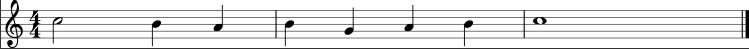

In [ ]:
ex3 = converter.parse("tinynotation: 4/4 c'2 ") #input the code to re-create the above sequence in the brackets ("tinynotation: "). The time signature and first note are provided.
ex3.show()

# **Summary**



*   You were able to run Music21 within the Colab environment.
*   You loaded some music from the internal corpus of Music21.
*   You noticed how you can select parts or measures of music.
*   You could display them by using the show command.





# **3 Visualise Music**

Let's look at some ways of summarising the musical content by producing visual representations of it.

First, let's import a score.

In [ ]:
from music21 import *
schoenberg = corpus.parse('schoenberg/opus19', 2) #command to input the second movement of Opus 19
schoenberg.measures(1, 5).show() # Command to show the first five bars

# **3.1 Visualise the raw note events**

We will now look at a piano roll representation of the first 5 bars of our score with the below command.

In [ ]:
schoenberg.measures(1, 5).plot()

# **3.2 Summary of note and duration frequencies**

We can also look at the distribution of pitches (pitch-class distribution) in a histogram.

In [ ]:
schoenberg.plot('histogram', 'pitchClass')

## Question #3

What is the above histogram telling us?

We can also look at the relationship between pitch class and note durations using a scatter plot.

In [ ]:
p = graph.plot.ScatterWeightedPitchClassQuarterLength(schoenberg)
p.run()

# **3.3 Summary over time**

Rather than looking at an accumulation of the notes, we can look at the pitch classes used over a number of bars, with the following command:

In [ ]:
schoenberg.plot('scatter', 'measure', 'pitchClass')

# **3.4 Visualise dynamics**

We can also look at the dynamics levels and their variations of the different instruments in a work. Let's use Beethoven's Opus 133 again to visualise the dynamics variations of the different instruments.

In [ ]:
beethoven = corpus.parse('beethoven/opus133.xml')
beethoven.measures(1,62).plot('dolan', fillByMeasure=True, segmentByTarget=True)

# **Learning Task**

Can you compare the pitch distributions of the Schoenberg and Beethoven examples (objects opus133 and schoenberg)? Note that you can visualise the pitches by using the keyword pitch:
schoenberg.plot('histogram', 'pitch')

## Question #4
Answer after computing the above.

In [ ]:
 #input command here to plot the schoenberg piece as a histogram

In [ ]:
 #input command here to plot the beethoven piece (opus133) as a histogram

# **Summary**

* You were able to display the raw events of a musical piece by using the pianoroll.
* Examples of simple visual summaries were introduced (pitch-class distribution, durations, etc.).
* There are plenty of other visualisations available, but let's move on to analysis.

# **4 Analyse Music**

Let's now look at some of the analytical qualities of Music21.

### **4.1 Qualities of chords**

`Music21` can infer a lot of information from stacks of pitches, that is, chords. They are such an important concept for music theory and analysis, so it is only natural that the software has a lot of options to deal with chords. 

We can build our own chords in Music21:

In [ ]:
chord1 = chord.Chord(["C4","G4","E5"]) # chord.Chord is the function needed to create our chord. In the square brackets we write down the pitches of the notes that will make up our chord.
chord1.duration.type = 'half' # duration of chord - remember this is in American terminology
kc = key.Key('C') # key (optional but useful later)
chord1B = chord1.closedPosition() # A variant in closed position

chord2 = chord.Chord("C F A")
chord2.duration.type = 'half'

chord3 = chord.Chord("D F G B")
chord3.duration.type = 'half'

chord1.show()

In [ ]:
chord2.show()

In [ ]:
chord3.show()

We can find out useful things about any of the chords with the following commands:

In [ ]:
chord3.show()
print(chord3.commonName)
print(chord3.quality)
print(chord3.forteClass)
print(chord3.orderedPitchClasses)

In [ ]:
# We can analyse the chords in a key context (the one we denoted earlier) and put the roman names into the score:
chord1.lyric = roman.romanNumeralFromChord(chord1, kc).figure
chord2.lyric= roman.romanNumeralFromChord(chord2, kc).figure
chord3.lyric= roman.romanNumeralFromChord(chord3, kc).figure
chord1B.lyric= roman.romanNumeralFromChord(chord1B, kc).figure

# Let's append the chords into a stream and look at the score with roman numerals.
stream1 = stream.Stream()
stream1.append(chord1)
stream1.append(chord2)
stream1.append(chord3)
stream1.append(chord1B)
stream1.show()

# **Learning Task:**

Change the pitches of chord2 to C, Eb, and A, and use the print(chord2.commonName) function to see the label Music21 attributes to the chord.

## Question #5
What is the label of chord2? 

In [ ]:
chord2 = chord.Chord("C F A") #change notes
chord2.duration.type = 'half'

chord2.show()

print(chord2.commonName)

### 4.2 Chord analysis
Let's now look at some harmonic analysis.

In [ ]:
# You are all experts in analysis of Bach chorales, so let's try to analyse them.
b = corpus.parse('bwv66.6') # We load a Bach Chorale BWV 66
b.measures(0, 2).show() # Let's look at the first bars

# Slice the chords for each beat with chordify
bChords = b.chordify()
bChords.metadata.movementName = 'Chord reduction'         # Put a label to the score
bChords.measures(0, 2).show()


for c in bChords.recurse().getElementsByClass('Chord'):   # This is a command used to simplify the chords
    c.closedPosition(forceOctave=4, inPlace=True)

for c in bChords.recurse().getElementsByClass('Chord'):   # This is where the analysis happens
    rn = roman.romanNumeralFromChord(c, key.Key('A'))     # We want to see the roman numerals for the different chords
    c.addLyric(str(rn.figure))

bChords.metadata.movementName = 'Analysis with Roman Numerals' #Add a title 
bChords.measures(0,2).show() # Show the result

### 4.3 Metrical analysis
Moving on to the temporal aspects of music, *Music21* has build-in metrical analysis module, which does Lerdahl-Jackendoff style metrical analysis. As you remember from your first year Analysis Module, this indicates how important are the different beats in the metrical hierarchy suggested by the time-signature.

In [ ]:
# Visualise metrical structures
from music21.analysis import metrical

# load a Bach Chorale from the music21 corpus of supplied pieces
bwv30_6 = corpus.parse('bach/bwv30.6.xml')
# get just the bass part
bass = bwv30_6.getElementById('Bass')
# get measures 1 through 10
excerpt = bass.measures(1,10)
# apply a Lerdahl/Jackendoff-style metrical analysis to the piece.
metrical.labelBeatDepth(excerpt)
# display the results
excerpt.show()

### Summary
* We explored simple harmonic analysis using chord and reduction functions in *Music21*.
* An example of metrical analysis was given. 
* In *Music21* you can combine analytical options, which might be used to carry out a reduction of music based on metrical hierarchy just to give an example.

## **5 References**

* Cuthbert, M. S., & Ariza, C. (2010). music21: A Toolkit for Computer-Aided Musicology and Symbolic Music Data. In J. Stephen Downie and Remco C. Veltkamp (Eds.). 11th International Society for Music Information Retrieval Conference (ISMIR 2010), August 9-13, 2010, Utrecht, Netherlands. pp. 637-642. [link](http://ismir2010.ismir.net/proceedings/ismir2010-108.pdf)

* Cuthbert, M. S., Ariza, C., & Friedland, L. (2011). Feature Extraction and Machine Learning on Symbolic Music using the music21 Toolkit. In 11th International Society for Music Information Retrieval Conference (ISMIR 2011) (pp. 387--392). [link](http://ismir2011.ismir.net/papers/PS3-6.pdf)
